In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import scanpy as sc
import numpy as np
import math

In [2]:
adata_out_lp = sc.read_h5ad("../../tmp_dialogue_experiments/data/v2/uc-dialogue-reduced-output-lp/uc-dialogue-reduced_pmd.h5ad")

In [3]:
adata_out_io =  sc.read_h5ad("../../tmp_dialogue_experiments/data/v2/uc-dialogue-reduced-output/uc-dialogue-reduced_pmd.h5ad")

In [5]:
adata_out_lp.obs

,Cluster,nGene,nUMI,Subject,Health,Location,Sample,cellQ,cell_type,log_nUMI,mcp_0,mcp_1,mcp_2
N44.LPA.GGGAATGAGCGTTCCG-immune,Plasma,238.0,20502.0,N44,Non-inflamed,LP,N44.LPA,0.280753,immune,9.928278,1.202523,1.063884,0.728866
N46.LPB.TCAGCAAAGTACGTAA-immune,Macrophages,2238.0,4667.0,N46,Healthy,LP,N46.LPB,0.027086,immune,8.448272,2.874559,2.217327,0.747108
N24.LPA.CATTATCTCTCTAGGA-immune,Plasma,592.0,3152.0,N24,Non-inflamed,LP,N24.LPA,0.274708,immune,8.055792,-1.622435,-1.566449,-1.431538
N106.LPB.AAGGTTCCAGGACGTA-immune,CD4+ Memory,4288.0,8336.0,N106,Inflamed,LP,N106.LPB,0.033489,immune,9.028339,0.823559,0.977053,1.379494
N19.LPA.CATGTACTTGGGAG-immune,CD4+ Memory,4932.0,10050.0,N19,Non-inflamed,LP,N19.LPA,0.098258,immune,9.215328,-0.146011,0.004276,0.465039
...,...,...,...,...,...,...,...,...,...,...,...,...,...
N14.LPB.TCGAGCCTTGCCCT-epithelial,TA 1,365.0,640.0,N14,Inflamed,LP,N14.LPB,0.008487,epithelial,6.461468,-0.464320,-0.438929,-0.380920
N110.LPB.AGAGTGGCAGCAGTTT-epithelial,Cycling TA,2360.0,7990.0,N110,Inflamed,LP,N110.LPB,0.247375,epithelial,8.985946,2.194814,2.073045,1.598980
N110.LPA.CATATGGTCGGTGTCG-epithelial,Cycling TA,867.0,1924.0,N110,Non-inflamed,LP,N110.LPA,0.014543,epithelial,7.562162,-2.550835,-2.661952,-2.852229
N21.LPA.TTCATGTGACGGGA-epithelial,Enteroendocrine,2325.0,13540.0,N21,Healthy,LP,N21.LPA,0.295743,epithelial,9.513404,-1.942646,-1.837085,-1.402929


In [47]:
samples = []
mcp_0 = []
mcp_1 = []
mcp_2 = []
cell_type = []
health = []
method = []
for index, row in adata_out_lp.obs.iterrows():
    samples.append(row["Sample"])
    mcp_0.append(row["mcp_0"])
    mcp_1.append(row["mcp_1"])
    mcp_2.append(row["mcp_2"])
    cell_type.append(row["cell_type"])
    method.append("lp")
    health.append(row["Health"])
    """if row["Health"]=="Healthy":
        health.append(0)
    elif row["Health"]=="Non-inflamed":
        health.append(1)
    else:
        health.append(2)"""

for index, row in adata_out_io.obs.iterrows():
    samples.append(row["Sample"])
    mcp_0.append(row["mcp_0"])
    mcp_1.append(row["mcp_1"])
    mcp_2.append(row["mcp_2"])
    cell_type.append(row["cell_type"])
    method.append("io")
    health.append(row["Health"])
    """ if row["Health"]=="Healthy":
        health.append(0)
    elif row["Health"]=="Non-inflamed":
        health.append(1)
    else:
        health.append(2)"""

my_df = pd.DataFrame({"sample":samples, "mcp_0":mcp_0, "mcp_1":mcp_1, "mcp_2":mcp_2, "cell_type":cell_type, "condition":health, "method":method})

In [5]:
my_df['condition'] = pd.Categorical(my_df['condition'], ["Healthy", "Non-inflamed", "Inflamed"])
my_df.sort_values("condition")

,sample,mcp_0,mcp_1,mcp_2,cell_type,condition,method
14279,N15.EpiA,-1.403481,-0.267761,-0.378396,epithelial,Healthy,io
3180,N20.LPB,-3.042200,-3.050578,-2.905856,fibroblast,Healthy,lp
6058,N16.LPB,-2.004849,-2.165638,-2.472125,epithelial,Healthy,lp
3182,N21.LPA,-2.951378,-2.912604,-2.633012,fibroblast,Healthy,lp
13624,N13.LPB,0.408219,-0.357440,0.763555,epithelial,Healthy,io
...,...,...,...,...,...,...,...
4917,N9.LPB,-2.402649,-2.262135,-1.767331,fibroblast,Inflamed,lp
11735,N26.LPB,0.102914,0.828950,-0.054792,fibroblast,Inflamed,io
4920,N539.LPB,5.048985,4.987762,4.824159,fibroblast,Inflamed,lp
4896,N52.LPB2b,0.145659,0.237833,0.454046,fibroblast,Inflamed,lp


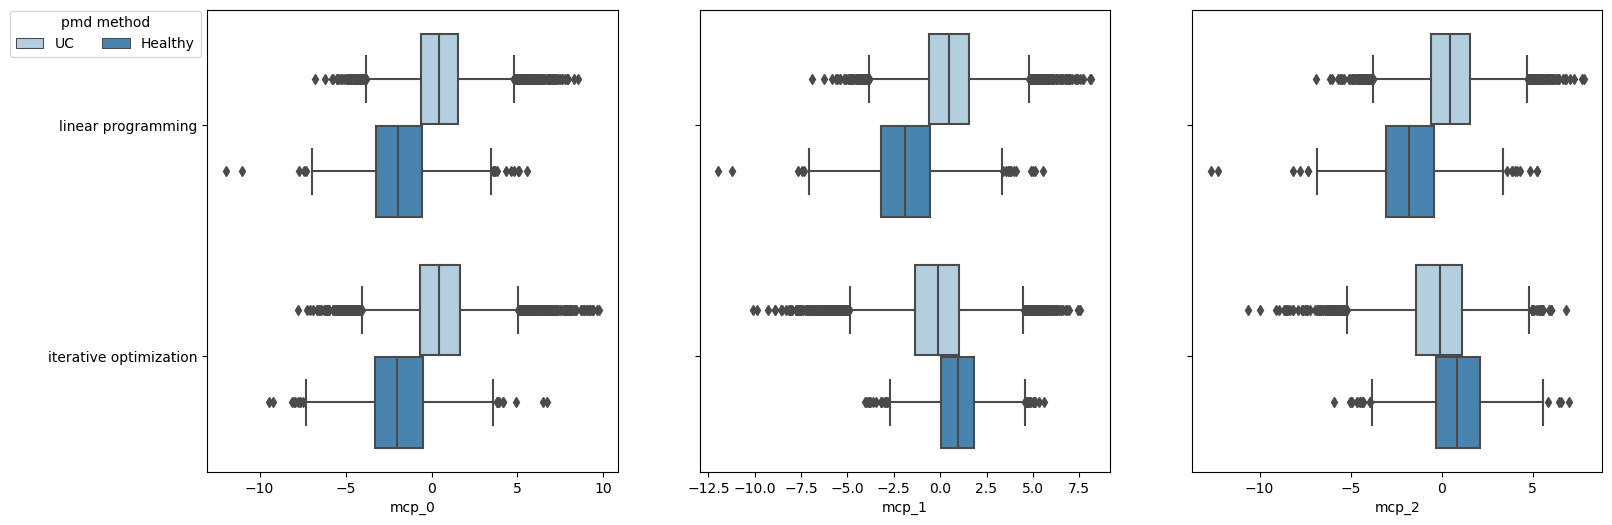

In [113]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))
# 95 % percentiles
#mcp0 = sns.violinplot(ax=axes[0], data=my_df, x="mcp_0", y="condition", hue="method", palette="Blues", split=True)
mcp0=sns.boxplot(ax=axes[0], data=my_df, x="mcp_0", hue="condition", y="method", palette="Blues")
mcp1=sns.boxplot(ax=axes[1], data=my_df, x="mcp_1", hue="condition", y="method", palette="Blues")
mcp2=sns.boxplot(ax=axes[2], data=my_df, x="mcp_2", hue="condition", y="method", palette="Blues")
mcp1.set(yticklabels=[])
mcp2.set(yticklabels=[])
mcp0.set(yticklabels=["linear programming", "iterative optimization"])
mcp0.set(ylabel=None)
mcp1.set(ylabel=None)
mcp2.set(ylabel=None)
mcp0.get_legend().remove()
mcp1.get_legend().remove()
mcp2.get_legend().remove()

# add legend
handles, labels = mcp0.get_legend_handles_labels()
fig.legend(handles, labels, title="pmd method",loc='upper right', ncol=3, bbox_to_anchor=(.125, 0.89))


-> correlation, lp, nimmt corr nicht ab, sus, weil

In [48]:
my_df_tt = my_df

In [49]:
my_df_tt['condition'] = np.where(my_df_tt['condition'] == "Non-inflamed",  "UC", my_df_tt['condition'])
my_df_tt['condition'] = np.where(my_df_tt['condition'] == "Inflamed",  "UC", my_df_tt['condition'])

In [50]:
my_df_tt

,sample,mcp_0,mcp_1,mcp_2,cell_type,condition,method
0,N44.LPA,1.202523,1.063884,0.728866,immune,UC,lp
1,N46.LPB,2.874559,2.217327,0.747108,immune,Healthy,lp
2,N24.LPA,-1.622435,-1.566449,-1.431538,immune,UC,lp
3,N106.LPB,0.823559,0.977053,1.379494,immune,UC,lp
4,N19.LPA,-0.146011,0.004276,0.465039,immune,UC,lp
...,...,...,...,...,...,...,...
17147,N14.LPB,-1.511048,0.232555,-1.235259,epithelial,UC,io
17148,N110.LPB,1.359463,2.522964,-2.175399,epithelial,UC,io
17149,N110.LPA,-3.425878,0.464637,1.228129,epithelial,UC,io
17150,N21.LPA,-2.207446,0.283885,1.609500,epithelial,Healthy,io


In [108]:
sc.stats.spearmanr(my_df_tt[my_df_tt["method"]=="io"]["mcp_2"], my_df_tt[my_df_tt["method"]=="io"]["condition"])

SignificanceResult(statistic=-0.21780245644809554, pvalue=1.2936328969810501e-92)

In [109]:
sc.stats.spearmanr(my_df_tt[my_df_tt["method"]=="lp"]["mcp_2"], my_df_tt[my_df_tt["method"]=="lp"]["condition"])

SignificanceResult(statistic=0.43682564057741663, pvalue=0.0)

In [112]:
sc.stats.spearmanr(my_df_tt[my_df_tt["method"]=="io"]["mcp_0"],my_df_tt[my_df_tt["method"]=="io"]["mcp_2"])

SignificanceResult(statistic=-0.28315416076869565, pvalue=7.662611998006724e-158)

In [ ]:
my_df_tt[my_df_tt["method"]=="lp"]["mcp_0"]

In [77]:
UC_mcp_0_lp

0       1.202523
2      -1.622435
3       0.823559
4      -0.146011
5       0.421427
          ...   
8570   -0.040846
8571   -0.464320
8572    2.194814
8573   -2.550835
8575   -0.397993
Name: mcp_0, Length: 6758, dtype: float64

In [61]:
UC_mcp_0_lp = my_df_tt[(my_df_tt["condition"]=="UC") & (my_df_tt["method"]=="lp")]["mcp_0"]
UC_mcp_0_io = my_df_tt[(my_df_tt["condition"]=="UC") & (my_df_tt["method"]=="io")]["mcp_0"]
H_mcp_0_lp = my_df_tt[(my_df_tt["condition"]=="Healthy") & (my_df_tt["method"]=="lp")]["mcp_0"]
H_mcp_0_io = my_df_tt[(my_df_tt["condition"]=="Healthy") & (my_df_tt["method"]=="io")]["mcp_0"]


UC_mcp_1_lp = my_df_tt[(my_df_tt["condition"]=="UC") & (my_df_tt["method"]=="lp")]["mcp_1"]
UC_mcp_1_io = my_df_tt[(my_df_tt["condition"]=="UC") & (my_df_tt["method"]=="io")]["mcp_1"]
H_mcp_1_lp = my_df_tt[(my_df_tt["condition"]=="Healthy") & (my_df_tt["method"]=="lp")]["mcp_1"]
H_mcp_1_io = my_df_tt[(my_df_tt["condition"]=="Healthy") & (my_df_tt["method"]=="io")]["mcp_1"]


UC_mcp_2_lp = my_df_tt[(my_df_tt["condition"]=="UC") & (my_df_tt["method"]=="lp")]["mcp_2"]
UC_mcp_2_io = my_df_tt[(my_df_tt["condition"]=="UC") & (my_df_tt["method"]=="io")]["mcp_2"]
H_mcp_2_lp = my_df_tt[(my_df_tt["condition"]=="Healthy") & (my_df_tt["method"]=="lp")]["mcp_2"]
H_mcp_2_io = my_df_tt[(my_df_tt["condition"]=="Healthy") & (my_df_tt["method"]=="io")]["mcp_2"]

## ttest

In [31]:
import scipy as sc

In [89]:
np.mean(H_mcp_0_lp)

-1.858034716163488

In [92]:
np.std(H_mcp_0_lp)

2.000810764802846

In [94]:
print(len(H_mcp_0_lp), len(UC_mcp_0_lp))

1818 6758


In [91]:
np.mean(UC_mcp_0_lp)

0.49983828262580937

In [93]:
np.std(UC_mcp_0_lp)

1.8493413669865848

In [70]:
sc.stats.ttest_ind(UC_mcp_2_lp, H_mcp_2_lp, alternative="greater")

Ttest_indResult(statistic=47.196332486144534, pvalue=0.0)

In [101]:
sc.stats.kstest(UC_mcp_2_lp, H_mcp_2_lp,  alternative="two-sided")

KstestResult(statistic=0.496658322239445, pvalue=6.02e-321, statistic_location=-0.9315905427230458, statistic_sign=-1)

In [102]:
sc.stats.kstest(UC_mcp_2_io, H_mcp_2_io,  alternative="two-sided")

KstestResult(statistic=0.22234252131931156, pvalue=1.389848534072272e-62, statistic_location=0.535606121577951, statistic_sign=1)

## how sparse are weights?


In [8]:
import pickle

In [9]:
weights_io_ife = pickle.load(
    open("pmd-permute/bs/uc-dialogue-reduced_ws_('immune', 'fibroblast', 'epithelial').pickle", "rb")
)
weights_lp_ife = pickle.load(
    open("pmd-permute/lp/uc-dialogue-reduced_ws_('immune', 'fibroblast', 'epithelial').pickle", "rb")
)


In [30]:
for cell_type in weights_io_ife.keys():
    print(np.sum(weights_io_ife[cell_type]==0))
    print(np.sum(abs(weights_lp_ife[cell_type])<0.1))
    

86
75
87
80
80
87


In [23]:
weights_lp_ife["immune"][:,0]

array([ 0.22321713,  0.34503722, -0.39093512,  0.00932344, -0.13747934,
        0.06451768,  0.17804929, -0.18449486,  0.13566951, -0.03611979,
        0.05199711, -0.00760222, -0.13574672, -0.12373065,  0.21206788,
        0.08422744,  0.17845098, -0.19317161,  0.06284852, -0.24994462,
        0.01189512, -0.04146899, -0.10409101,  0.22190459,  0.14892181,
       -0.06738757, -0.02805607,  0.0635613 ,  0.04834946, -0.02169345,
       -0.16876414, -0.04417007, -0.1014998 ,  0.20793325, -0.03808498,
       -0.11043959,  0.14864199,  0.06529544, -0.02058831,  0.23655454,
        0.04539186,  0.11742552, -0.12192811, -0.07083602, -0.08347968,
        0.05615037, -0.08758615,  0.12160071, -0.02253814,  0.00860117])

### sum with weights from lp solver

In [ ]:
np.dot(np.dot(np.dot(np.asarray(weights_lp_ife["immune"][:, 0]).T, np.asarray(data_immune).T),np.asarray(data_epi)), np.asarray(weights_lp_ife["epithelial"][:,0]))+\
np.dot(np.dot(np.dot(np.asarray(weights_lp_ife["immune"][:, 0]).T, np.asarray(data_immune).T),np.asarray(data_fib)), np.asarray(weights_lp_ife["fibroblast"][:,0]))+\
np.dot(np.dot(np.dot(np.asarray(weights_lp_ife["epithelial"][:, 0]).T, np.asarray(data_epi).T),np.asarray(data_fib)), np.asarray(weights_lp_ife["fibroblast"][:,0]))